# REGRESSION PROJECT

## 1. Importation des Bibliothèques

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## 2. Chargement des Données

In [41]:
data = pd.read_csv("Advertising Budget and Sales.csv", sep =",")

In [42]:
data

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [43]:
data = data.rename(columns = {'Unnamed: 0':'id',
                              'TV Ad Budget ($)':'tv_ad_budget(k)',
                              'Radio Ad Budget ($)':'radio_ad_budget(k)',
                              'Newspaper Ad Budget ($)':'newspaper_ad_budget(k)',
                              'Sales ($)':'sales(M)'
                             })

## 3. Analyse Exploratoire des Données (EDA)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      200 non-null    int64  
 1   tv_ad_budget(k)         200 non-null    float64
 2   radio_ad_budget(k)      200 non-null    float64
 3   newspaper_ad_budget(k)  200 non-null    float64
 4   sales(M)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [45]:
#vérification des doublons
data.duplicated().sum()

0

In [46]:
#vérification des valeurs manquantes
data.isnull().sum()

id                        0
tv_ad_budget(k)           0
radio_ad_budget(k)        0
newspaper_ad_budget(k)    0
sales(M)                  0
dtype: int64

In [47]:
data.head()

,id,tv_ad_budget(k),radio_ad_budget(k),newspaper_ad_budget(k),sales(M)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [48]:
data.describe()

,id,tv_ad_budget(k),radio_ad_budget(k),newspaper_ad_budget(k),sales(M)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


- Budget télévisé : 
- Budget radio : 
- Budget presse :
- Ventes

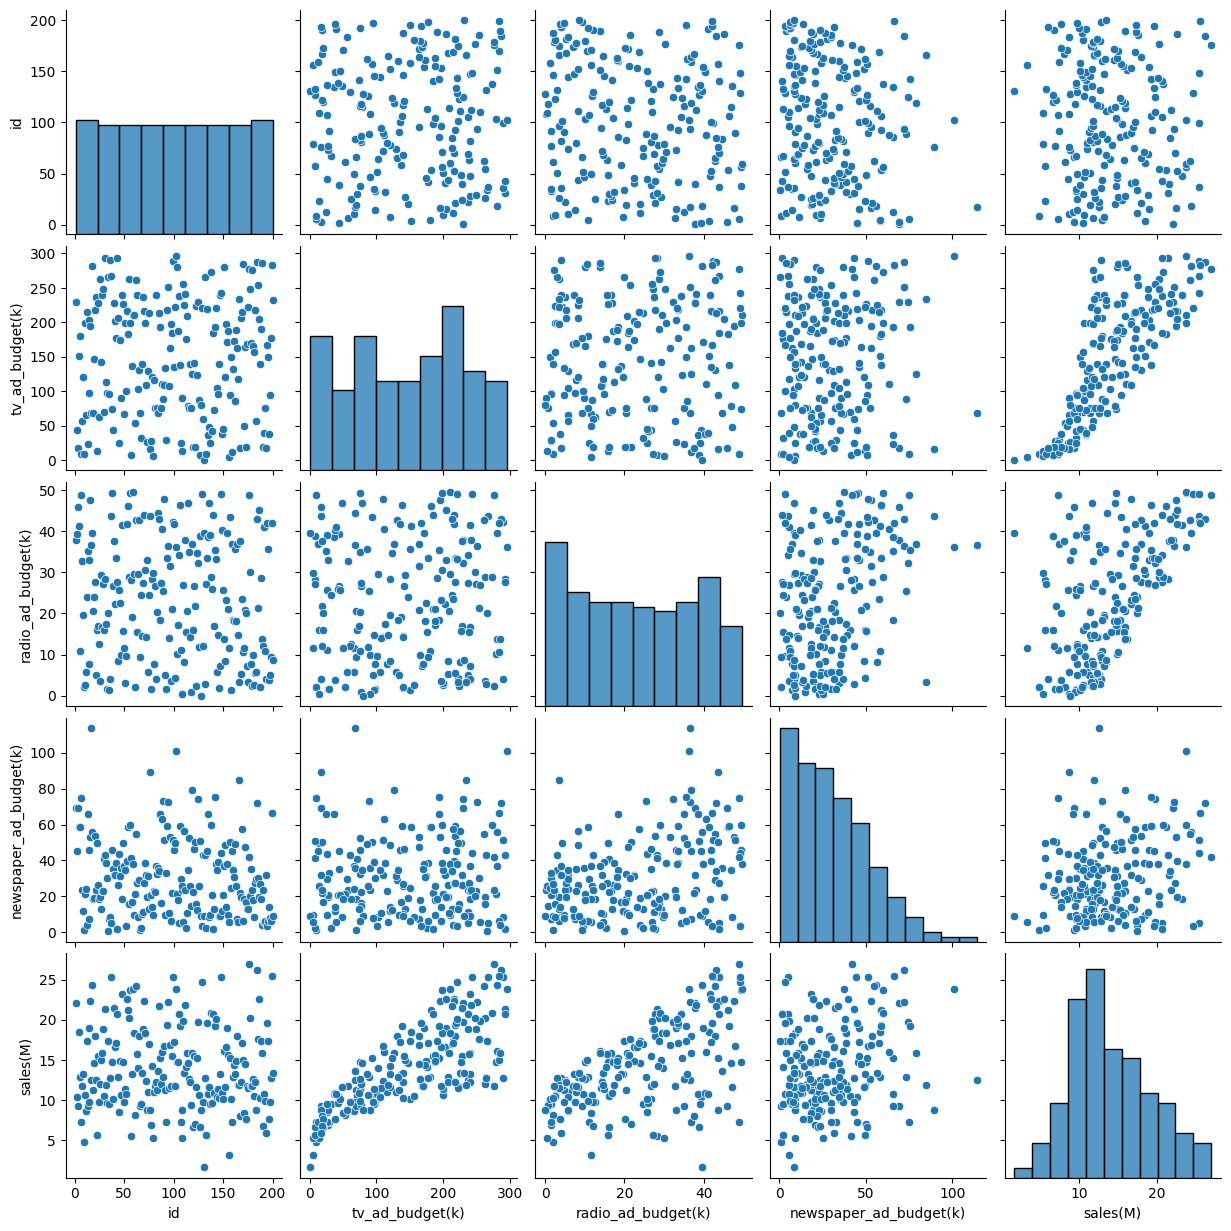

In [49]:
sns.pairplot(data)
plt.show()

In [50]:
corr_matrix = data.corr()
corr_matrix

,id,tv_ad_budget(k),radio_ad_budget(k),newspaper_ad_budget(k),sales(M)
id,1.000000,0.017715,-0.110680,-0.154944,-0.051616
tv_ad_budget(k),0.017715,1.000000,0.054809,0.056648,0.782224
radio_ad_budget(k),-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper_ad_budget(k),-0.154944,0.056648,0.354104,1.000000,0.228299
sales(M),-0.051616,0.782224,0.576223,0.228299,1.000000


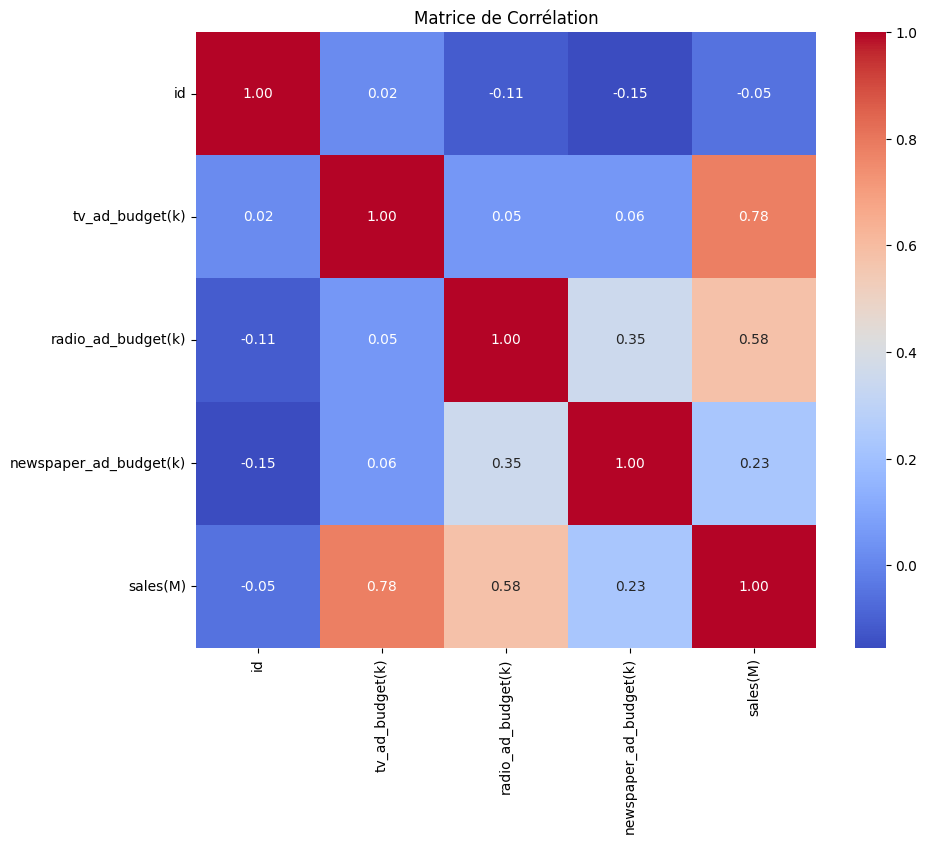

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

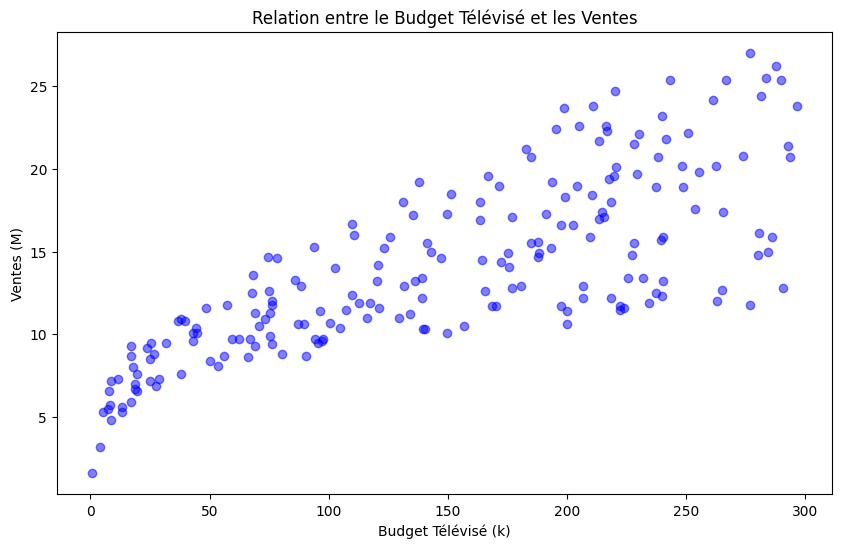

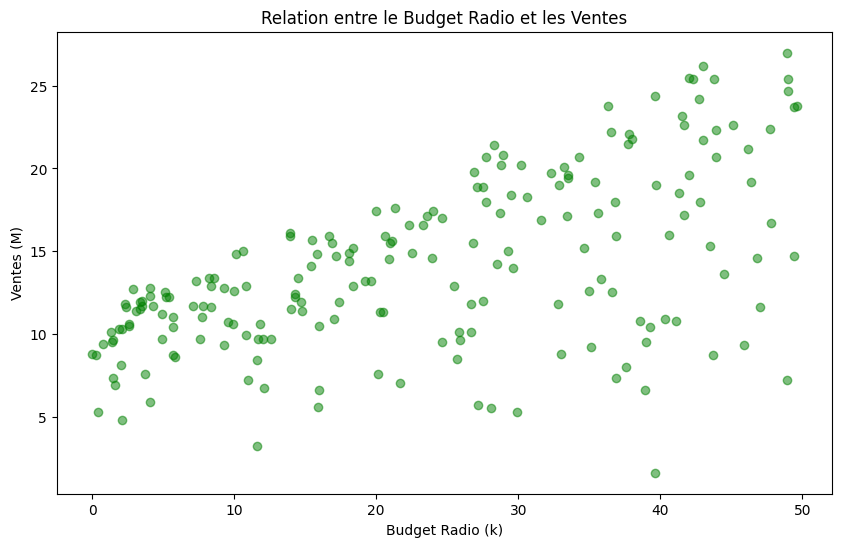

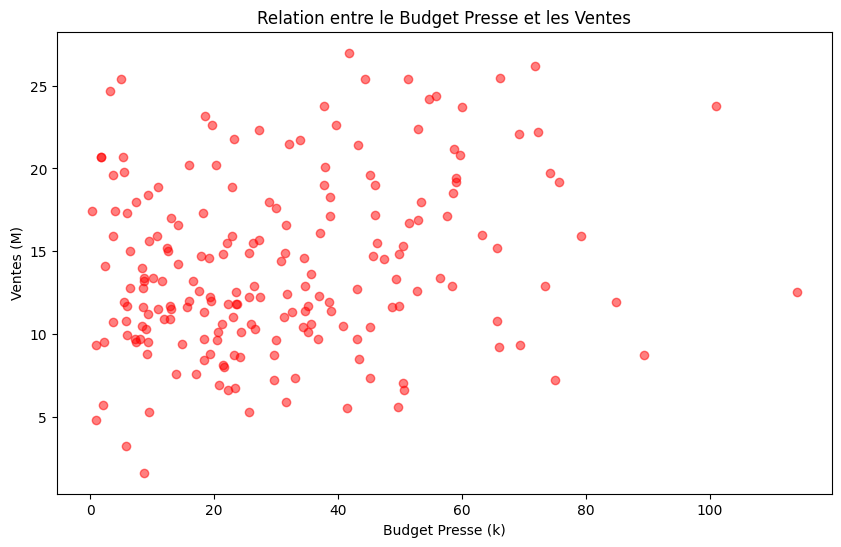

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(data['tv_ad_budget(k)'], data['sales(M)'], color='blue', alpha=0.5)
plt.title('Relation entre le Budget Télévisé et les Ventes')
plt.xlabel('Budget Télévisé (k)')
plt.ylabel('Ventes (M)')
plt.show()

# Scatterplot pour radio_ad_budget(k)
plt.figure(figsize=(10, 6))
plt.scatter(data['radio_ad_budget(k)'], data['sales(M)'], color='green', alpha=0.5)
plt.title('Relation entre le Budget Radio et les Ventes')
plt.xlabel('Budget Radio (k)')
plt.ylabel('Ventes (M)')
plt.show()

# Scatterplot pour newspaper_ad_budget(k)
plt.figure(figsize=(10, 6))
plt.scatter(data['newspaper_ad_budget(k)'], data['sales(M)'], color='red', alpha=0.5)
plt.title('Relation entre le Budget Presse et les Ventes')
plt.xlabel('Budget Presse (k)')
plt.ylabel('Ventes (M)')
plt.show()

### Insights clés

* La télévision est le média le plus efficace pour générer des ventes, suivi de la radio, puis de la presse.
* La presse a un impact limité et pourrait être un candidat pour une réduction budgétaire.
* La radio et la presse ont une légère corrélation entre elles, ce qui pourrait indiquer que les entreprises qui investissent dans l'un investissent aussi dans l'autre.

## 4. Préparation des Données

In [52]:
data_reg = data.drop(columns=['id'])

In [53]:
data_reg

,tv_ad_budget(k),radio_ad_budget(k),newspaper_ad_budget(k),sales(M)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [54]:
# Séparer les caractéristiques (X) et la cible (y)
X = data[['tv_ad_budget(k)', 'radio_ad_budget(k)', 'newspaper_ad_budget(k)']]
y = data['sales(M)']

In [55]:
# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


In [56]:
# Standardiser les données (moyenne = 0, écart-type = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Construction des Modèles

In [57]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Utilisez X_train_scaled si vous avez standardisé les données

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_scaled)  # Utilisez X_test_scaled si vous avez standardisé les données

# Évaluer le modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.7815996615334504
R²: 0.899438024100912


* R² = 0.899 : Le modèle explique environ 90% de la variance des ventes, ce qui est excellent. 
* RMSE = 1.78 : L'erreur moyenne de prédiction est de 1.78 unités de ventes, ce qui est relativement faible.

In [58]:
# Afficher les coefficients du modèle
coefficients = model.coef_
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

tv_ad_budget(k): 3.7641961751469992
radio_ad_budget(k): 2.792306650198436
newspaper_ad_budget(k): 0.05597551446265309


* tv_ad_budget(k): 3.76 (impact fort et positif sur les ventes).
* radio_ad_budget(k): 2.79 (impact positif, mais moins fort que la télévision).
* newspaper_ad_budget(k): 0.056 (impact très faible).

In [59]:
# Entraîner un modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédire et évaluer
y_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest RMSE: 0.7687817473119395
Random Forest R²: 0.9812750924472915


* R² = 0.981 : Le modèle explique 98.1% de la variance des ventes, ce qui est encore meilleur que la régression linéaire.
* RMSE = 0.77 : L'erreur moyenne de prédiction est réduite à 0.77 unités de ventes.

In [61]:
# Importance des caractéristiques pour Random Forest
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

tv_ad_budget(k): 0.6248103070046955
radio_ad_budget(k): 0.3622008907155749
newspaper_ad_budget(k): 0.012988802279729702


* tv_ad_budget(k): 62.5% (le média le plus important).
* radio_ad_budget(k): 36.2% (secondaire, mais significatif).
* newspaper_ad_budget(k): 1.3% (impact négligeable).

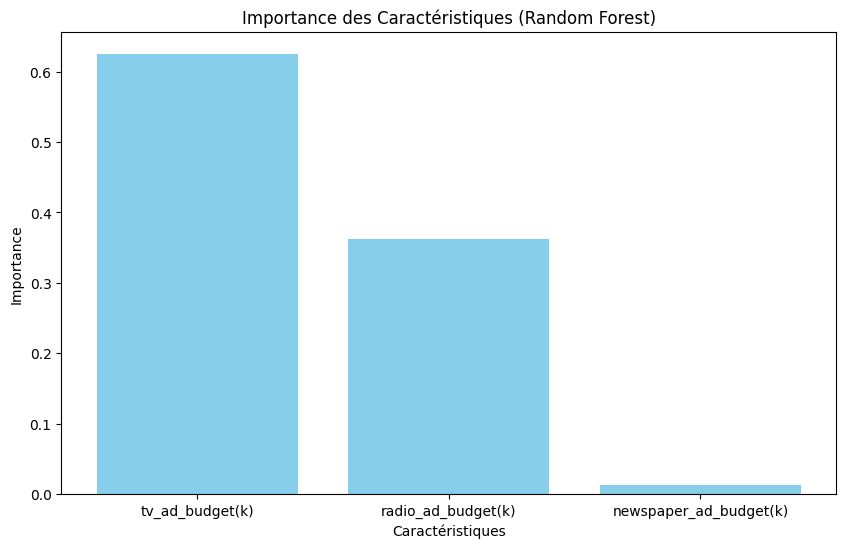

In [67]:
importances = rf_model.feature_importances_
features = X.columns

# Créer un barplot
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Importance des Caractéristiques (Random Forest)')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()

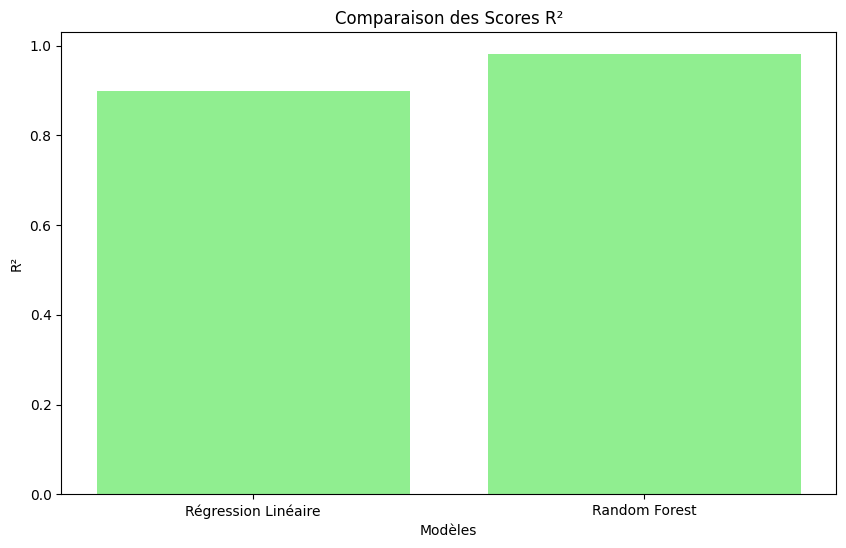

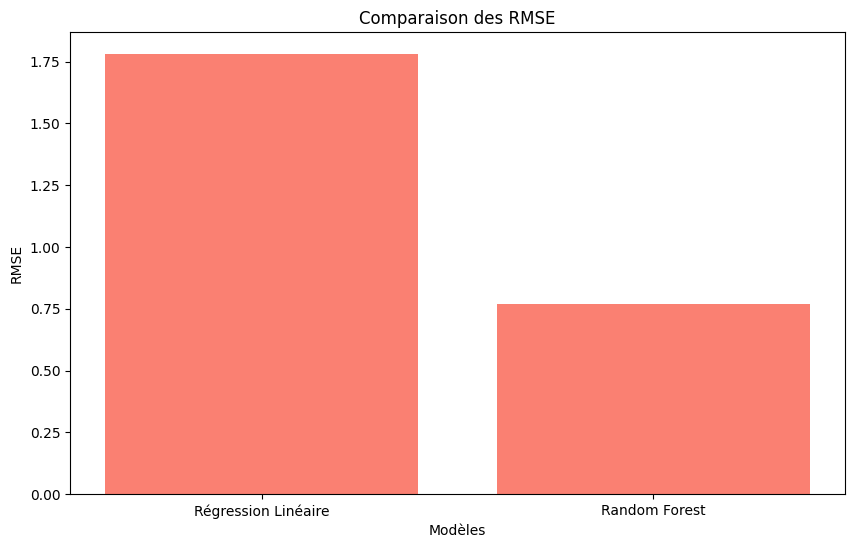

In [68]:
models = ['Régression Linéaire', 'Random Forest']
r2_scores = [0.899, 0.981]  # Remplacez par vos valeurs réelles
rmse_scores = [1.78, 0.77]  # Remplacez par vos valeurs réelles

# Barplot pour R²
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='lightgreen')
plt.title('Comparaison des Scores R²')
plt.xlabel('Modèles')
plt.ylabel('R²')
plt.show()

# Barplot pour RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='salmon')
plt.title('Comparaison des RMSE')
plt.xlabel('Modèles')
plt.ylabel('RMSE')
plt.show()

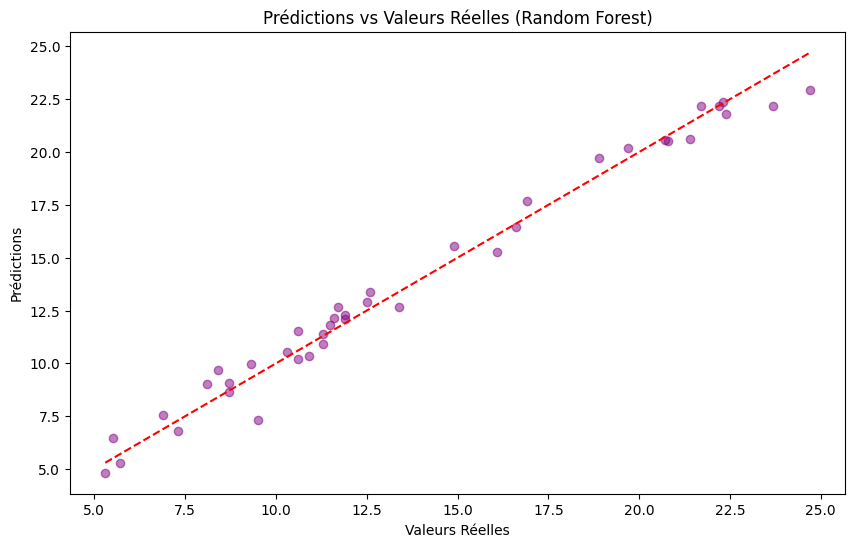

In [71]:
# Scatterplot des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne de référence
plt.title('Prédictions vs Valeurs Réelles (Random Forest)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.show()

## 6. Conclusion et Recommandations

###  1- La télévision est le média le plus efficace :
#### Le budget télévisé a le plus grand impact sur les ventes, avec une importance de 62.5% dans le modèle Random Forest.

###  2- La radio est un bon complément :
#### Le budget radio a un impact significatif, mais moins fort que la télévision, avec une importance de 36.2%.

### 3- La presse a un impact limité :
#### Le budget presse a un impact négligeable (1.3%) sur les ventes.



###  + Allouer plus de budget à la télévision
###  + Maintenir ou légèrement augmenter le budget radio
###  + Réduire ou réallouer le budget presse